1. **Imports**:
   - We import necessary libraries and modules:
     - `pandas`: For data manipulation and analysis.
     - `numpy`: For numerical computations.
     - `MinMaxScaler` from `sklearn.preprocessing`: For feature scaling.
     - `train_test_split` from `sklearn.model_selection`: For splitting the dataset into training and testing sets.
     - `tensorflow` and its submodules: For building and training neural networks.
     - `matplotlib.pyplot`: For data visualization.

2. **Load Data**:
   - We load the cleaned dataset from the CSV file using `pd.read_csv()`.

3. **Data Preprocessing**:
   - We scale the input features using `MinMaxScaler` to ensure they are on a similar scale.
   - The dataset is split into training, validation, and test sets using `train_test_split()`.

4. **Model Architecture - DNN**:
   - We define the architecture of the Deep Neural Network (DNN) model using `Sequential()` from TensorFlow.keras.
   - The model consists of multiple dense (fully connected) layers with ReLU activation functions.
   - BatchNormalization layers are added to normalize the activations of the previous layer.
   - Dropout layers are added to mitigate overfitting by randomly dropping a fraction of the connections during training.

5. **Compile the Model**:
   - We compile the model using the Adam optimizer and Mean Squared Error (MSE) loss function.

6. **Callbacks**:
   - EarlyStopping: Monitor the validation loss and stop training if there is no improvement for a certain number of epochs to prevent overfitting.
   - ReduceLROnPlateau: Reduce the learning rate if the validation loss plateaus to help the model converge better.

7. **Model Training**:
   - We train the DNN model using the training data and validate it using the validation data.
   - The model is trained for a maximum of 50 epochs with a batch size of 64 samples.

8. **Evaluation**:
   - We evaluate the trained model's performance on the test set using the test data.
   - The test loss (MSE) is computed and printed to assess the model's generalization performance.

9. **Visualization**:
   - We plot the training and validation loss curves to visualize the training progress and identify potential overfitting.

10. **Prediction**:
    - Finally, we make predictions on the test set using the trained DNN model.

This code implements a Deep Neural Network model for energy consumption prediction in smart home environments, incorporating advanced techniques such as batch normalization, dropout regularization, and early stopping. It aims to achieve accurate and robust predictions while preventing overfitting and ensuring efficient training convergence. Adjustments to hyperparameters and architecture can be made based on experimentation and evaluation results.

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error



In [53]:
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
data_files_dir = os.path.abspath(os.path.join(notebook_dir, os.pardir, os.pardir, 'data_cleaning_module', 'dnn_cleaned_data', 'output_cleaned_dnn_data'))
file_path = os.path.join(data_files_dir, 'DNN_HomeA-meter4_2016_updated.csv')
df = pd.read_csv(file_path, index_col='Date & Time')

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 502743 entries, 2016-01-01 00:00:00 to 2016-12-31 23:59:00
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   KitchenDenLights [kW]             502743 non-null  float64
 1   MasterBedBathLights [kW]          502743 non-null  float64
 2   MasterOutlets [kW]                502743 non-null  float64
 3   DenOutdoorLights [kW]             502743 non-null  float64
 4   DenOutlets [kW]                   502743 non-null  float64
 5   RearBasementLights [kW]           502743 non-null  float64
 6   KitchenOutletsEast [kW]           502743 non-null  float64
 7   KitchenOutletsSouth [kW]          502743 non-null  float64
 8   DishwasherDisposalSinkLight [kW]  502743 non-null  float64
 9   Refrigerator [kW]                 502743 non-null  float64
 10  Microwave [kW]                    502743 non-null  float64
 11  OfficeLights [kW]         

,KitchenDenLights [kW],MasterBedBathLights [kW],MasterOutlets [kW],DenOutdoorLights [kW],DenOutlets [kW],RearBasementLights [kW],KitchenOutletsEast [kW],KitchenOutletsSouth [kW],DishwasherDisposalSinkLight [kW],Refrigerator [kW],Microwave [kW],OfficeLights [kW],Total Energy Demand
Date & Time,,,,,,,,,,,,,
2016-01-01 00:00:00,0.018227,0.099599,0.015457,0.025498,0.001271,0.037812,0.002350,0.001943,0.001948,0.105713,0.002314,0.045191,0.357323
2016-01-01 00:15:00,0.018080,0.019319,0.015511,0.027239,0.001302,0.037605,0.002289,0.001939,0.001945,0.110827,0.002376,0.044987,0.283419
2016-01-01 00:30:00,0.018035,0.019061,0.014964,0.026866,0.001309,0.037835,0.002172,0.001974,0.001979,0.026544,0.002291,0.044845,0.197874
2016-01-01 00:45:00,0.018099,0.019002,0.015063,0.027736,0.001310,0.037628,0.002262,0.001949,0.001950,0.103128,0.002375,0.044855,0.275356
2016-01-01 01:00:00,0.018041,0.018991,0.014488,0.027674,0.001310,0.037789,0.002251,0.001950,0.001952,0.097399,0.002363,0.044872,0.269079


In [54]:
# Data Preprocessing
scaler = MinMaxScaler()
df.sort_index(inplace=True)  # Ensure the DataFrame is sorted by the index

X = scaler.fit_transform(df.drop(columns=['Total Energy Demand']))
y = df['Total Energy Demand']

# Temporal Data Splitting
train_size = int(0.8 * len(df))
val_size = int(0.1 * len(df))

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

In [55]:
# Model Architecture - DNN
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Update lr to learning_rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define callbacks for early stopping and learning rate reduction
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
]

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=callbacks)

# Evaluation
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

Epoch 1/50
6285/6285 [==============================] - 16s 2ms/step - loss: 0.0575 - val_loss: 0.0016 - lr: 0.0010
Epoch 2/50
6285/6285 [==============================] - 16s 3ms/step - loss: 0.0060 - val_loss: 7.6978e-04 - lr: 0.0010
Epoch 3/50
6285/6285 [==============================] - 14s 2ms/step - loss: 0.0046 - val_loss: 8.9740e-04 - lr: 0.0010
Epoch 4/50
6285/6285 [==============================] - 14s 2ms/step - loss: 0.0042 - val_loss: 7.2361e-04 - lr: 0.0010
Epoch 5/50
6285/6285 [==============================] - 13s 2ms/step - loss: 0.0041 - val_loss: 0.0012 - lr: 0.0010
Epoch 6/50
6285/6285 [==============================] - 13s 2ms/step - loss: 0.0038 - val_loss: 6.3267e-04 - lr: 2.0000e-04
Epoch 7/50
6285/6285 [==============================] - 13s 2ms/step - loss: 0.0037 - val_loss: 8.2575e-04 - lr: 2.0000e-04
Epoch 8/50
6285/6285 [==============================] - 11s 2ms/step - loss: 0.0037 - val_loss: 6.5721e-04 - lr: 2.0000e-04
Epoch 9/50
6285/6285 [==============

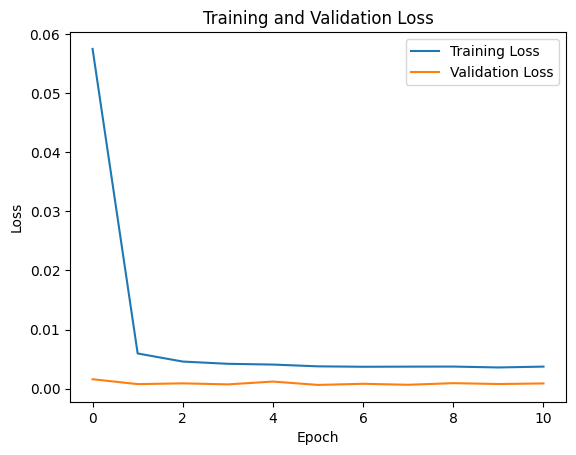

In [56]:
# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
# Evaluation
test_predictions = model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, test_predictions)
mape = mean_absolute_percentage_error(y_test, test_predictions)

r2 = r2_score(y_test, test_predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R2) Score:", r2)

1572/1572 [==============================] - 1s 742us/step
Mean Absolute Error (MAE): 0.019176113683694217
Mean Absolute Percentage Error (MAPE): 0.0394595804876368
R-squared (R2) Score: 0.9887249429484603


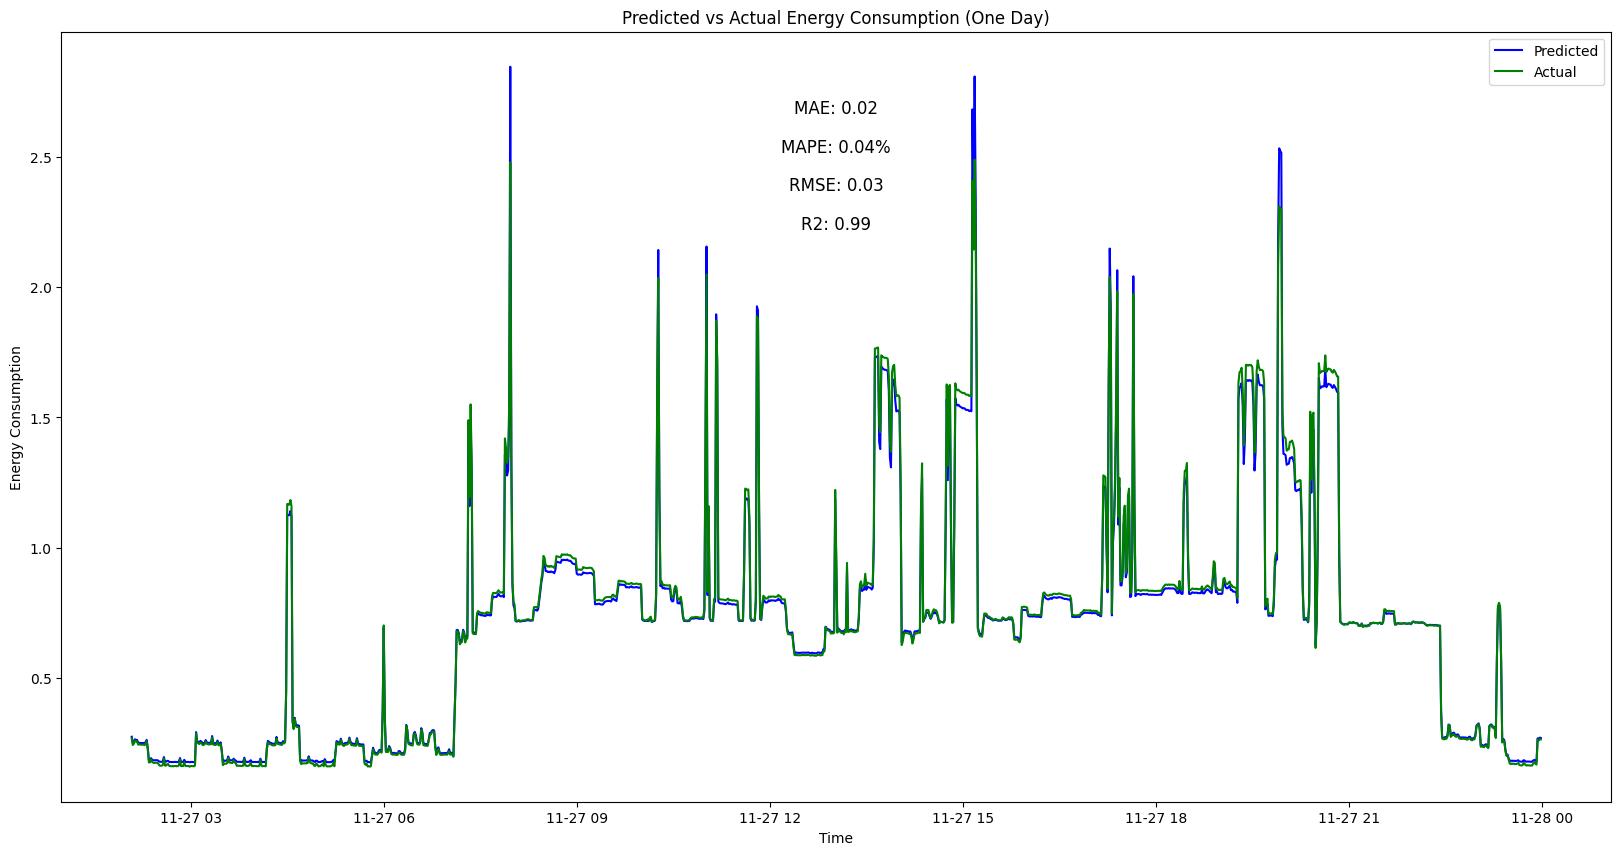

In [58]:
# Convert the predictions and actual values to DataFrame with datetime index
test_predictions_df = pd.DataFrame(test_predictions, index=df.index[train_size+val_size:])
y_test_df = pd.DataFrame(y_test, index=df.index[train_size+val_size:])

# Extract data for one day
start_date = '2016-11-27'
end_date = '2016-11-28'
predicted_day = test_predictions_df[start_date:end_date]
actual_day = y_test_df[start_date:end_date]

predicted_day.index = pd.to_datetime(predicted_day.index)
actual_day.index = pd.to_datetime(actual_day.index)
rmse = mean_squared_error(actual_day, predicted_day, squared=False)

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(predicted_day.index, predicted_day.values, label='Predicted', color='blue')
plt.plot(actual_day.index, actual_day.values, label='Actual', color='green')
plt.title('Predicted vs Actual Energy Consumption (One Day)')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()

# Add evaluation metrics to the plot
plt.text(0.5, 0.9, f'MAE: {mae:.2f}', horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12)
plt.text(0.5, 0.85, f'MAPE: {mape:.2f}%', horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12)
plt.text(0.5, 0.8, f'RMSE: {rmse:.2f}', horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12)
plt.text(0.5, 0.75, f'R2: {r2:.2f}', horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12)

plt.show()





In [59]:
graph_file_path = 'loss_curve.png'
plt.savefig(graph_file_path)

# Save predicted and actual values to CSV files
predicted_day.to_csv('predicted_values.csv')
actual_day.to_csv('actual_values.csv')


<Figure size 640x480 with 0 Axes>